**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Israel Campos Báez
*   MATRÍCULA: A01334976


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire: 

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje total de valores faltantes

In [29]:
from google.colab import drive
drive.mount('/content/drive')
air_df=pd.read_csv(url)
print(air_df)
df = (air_df['Value'] / air_df['Value'].sum()) * 100
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0      CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1      CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2      CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3      CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4      CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
...    ...     ...               ...    ...     ...                     ...
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31/12/2017 22:00    5.0  ug m-3                       R
43799  CT3   PM2.5  31/12/2017 23:0

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [21]:
print("Numero de mediciones", len(air_df.index))
print("Numero de contaminantes ",air_df["Species"].value_counts())
air_df.drop_duplicates("Value")
print(air_df['Units'].unique())
air_df.drop_duplicates("Units")

Numero de mediciones 43800
Numero de contaminantes  NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
['ug m-3' 'ug m-3 as NO2' 'ug/m3']


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
17520,CT3,NOX,01/01/2017 00:00,36.2,ug m-3 as NO2,R
26280,CT3,PM10,01/01/2017 00:00,35.7,ug/m3,R


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [22]:
print(air_df.value_counts(air_df["Species"]))

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
dtype: int64


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [23]:
print(air_df.groupby(['Species']).mean())

             Value
Species           
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [24]:
pvt_df=pd.pivot(air_df,index=['ReadingDateTime'], columns = 'Species',values = 'Value')
print(pvt_df)

Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [25]:
print(pvt_df[["NO2"]].describe().loc[['max']])
print(pvt_df[["PM10"]].describe().loc[["min"]])
print(pvt_df[["NO"]].describe().loc[["mean"]])
# es el valor que ocupa el centro de todos los datos
print(pvt_df[["PM2.5"]].describe().loc[["25%"]])
# El 25% de esos valores se encuentran en este rango

Species    NO2
max      120.2
Species  PM10
min      -5.6
Species         NO
mean     15.045115
Species  PM2.5
25%        7.0


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

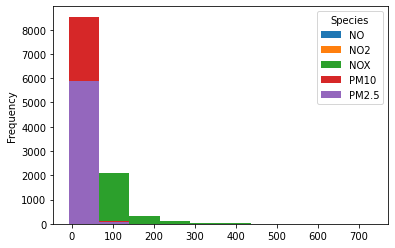

In [26]:
ax = pvt_df.plot.hist()
# el de mayor variabilidad es NOX, ya que tiene un mayor espectro de datos

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [27]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # Separa fechas y horas
datetime_df.columns = ['Date','Time'] # Crea dos columnas
datetime_df # Imprime el resultado
date_df = datetime_df.Date.str.split('/',expand=True) # Separa la fecha por día, mes y año
date_df.columns = ['Day','Month','Year'] # Crea las columnas para dd mm yy
date_df # Imprime el resulatado
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #Une las dos tablas creadas
air_df = air_df.set_index(['Month','Day','Time','Species']) # Modifica el orden y nombre de as columnas
air_df #Imprimer el resultado

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

In [28]:
air_df.unstack() # No, esta funcion descomprime todos los valores tal cual

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt nos permite añadir más de una columna a los valores de el nuevo Data Frame
Pivot solo permite una sola columna.

Stack nos permite pasar simplemente de una columna a fila; Unstack por el contrario, nos permite menjar múltiples filas y transformarlas a columnas.

Una contraparte para Melt, sería Unstack ya que Melt solo nis permite manejar una sola columna y unstack permite múltiples índeces. 